<a href="https://colab.research.google.com/github/MendasD/CertificatIA_ForceN/blob/main/Projet_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet Deep Learning FORCE-N**

## **Importation des modules necessaires**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.utils import plot_model
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Chargement du dataset**

In [ ]:
creditcard = pd.read_csv('creditcard_2023.csv')
data = creditcard.copy()

In [ ]:
data.shape

(568630, 31)

In [ ]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [ ]:
data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [ ]:
data.drop(columns=['id'], inplace=True)
# On vérifie s'il y a des valeurs manquantes
data.isnull().sum().sum()

0

In [ ]:
# Types de données (on verifie s'il y a des données catégorielles)
data.select_dtypes(include='object').columns

Index([], dtype='object')

In [ ]:
# Présence de doublons
data[data.duplicated()]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
510531,-1.704517,2.599199,-1.205391,0.503527,-0.949674,3.226002,-2.323095,-6.027712,0.273389,-0.698893,...,8.08708,-6.450353,6.343132,-1.075048,0.349881,-0.240261,1.534445,2.154102,22549.29,1


In [ ]:
# Nombre de classes
data['Class'].value_counts()

,count
Class,
0,284315
1,284315


## **Pré-traitement**

In [ ]:
# Séparation du dataset
X = data.drop('Class', axis=1)
y = data['Class']

print('Dimension de X: ',X.shape)
print('Dimension de y: ',y.shape)

Dimension de X:  (568630, 29)
Dimension de y:  (568630,)


In [ ]:
# Standardisation
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(568630, 29)

In [ ]:
# Séparation du jeu de données pour l'entraînement et le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Dimension de X_train: ',X_train.shape)
print('Dimension de y_train: ',y_train.shape)
print('Dimension de X_test: ',X_test.shape)
print('Dimension de y_test: ',y_test.shape)

Dimension de X_train:  (454904, 29)
Dimension de y_train:  (454904,)
Dimension de X_test:  (113726, 29)
Dimension de y_test:  (113726,)


## **Modélisation**

### Modèle séquentiel

Nous ajouterons d'autres couches intermédiaires, parmi lesuelles des couches dropout car, elles permettent de:

*   Réduire l'overfitting, surtout pour des réseaux profonds.
*   Encourager le réseau à apprendre des caractéristiques plus indépendantes et robustes.




In [ ]:
# Instantiation du modèle
model = Sequential()

# Ajout des couches
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='relu'))
model.add(Dropout(0.5))

In [ ]:
# Couche de classification binaire
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',Precision(), Recall(), AUC()])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,713 (18.41 KB)

 Trainable params: 4,713 (18.41 KB)

 Non-trainable params: 0 (0.00 B)

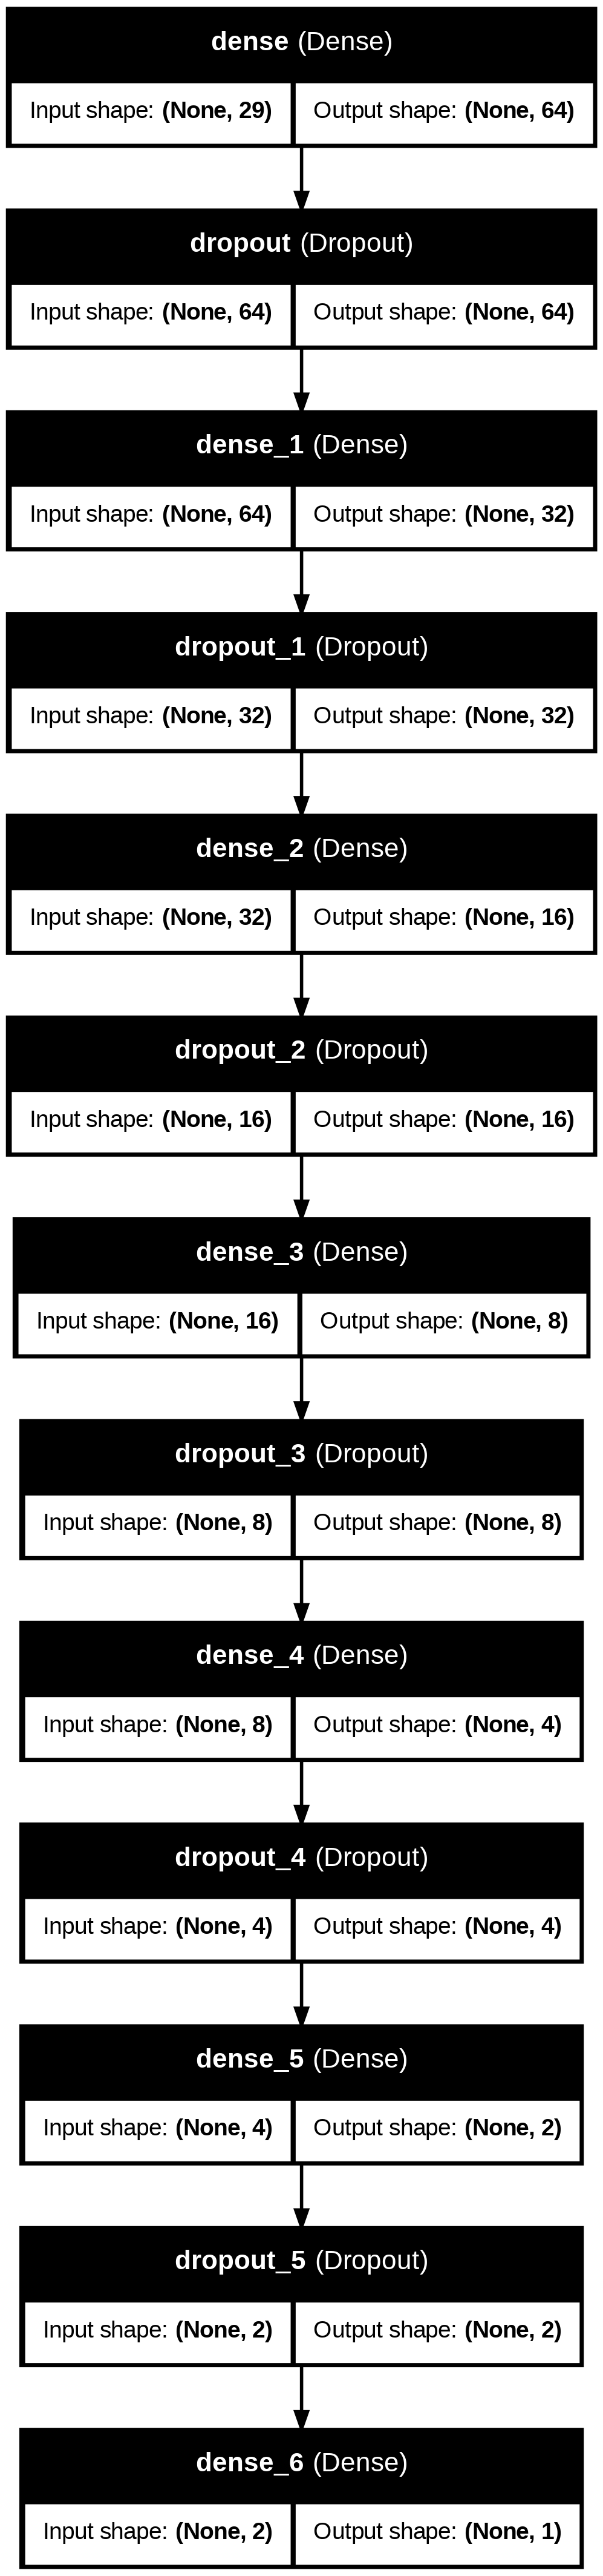

In [ ]:
# Visualisation de la structure du modèle
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Entraînement du modèle
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 65s 4ms/step - accuracy: 0.7039 - auc: 0.7267 - loss: 0.5404 - precision: 0.9453 - recall: 0.4286 - val_accuracy: 0.9602 - val_auc: 0.9703 - val_loss: 0.2355 - val_precision: 0.9962 - val_recall: 0.9240
Epoch 2/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 85s 5ms/step - accuracy: 0.7855 - auc: 0.7918 - loss: 0.4473 - precision: 0.9918 - recall: 0.5756 - val_accuracy: 0.9750 - val_auc: 0.9835 - val_loss: 0.2075 - val_precision: 0.9964 - val_recall: 0.9535
Epoch 3/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 85s 5ms/step - accuracy: 0.8046 - auc: 0.8113 - loss: 0.4232 - precision: 0.9910 - recall: 0.6154 - val_accuracy: 0.9802 - val_auc: 0.9852 - val_loss: 0.2027 - val_precision: 0.9958 - val_recall: 0.9646
Epoch 4/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 64s 4ms/step - accuracy: 0.8077 - auc: 0.8128 - loss: 0.4208 - precision: 0.9907 - recall: 0.6213 - val_accuracy: 0.9813 - val_auc: 0.9871 - val_loss: 0.1974 - val_precision: 0.9974 - val_recall: 0.9651
Epoch 5/10
1

In [ ]:
# Performances du modèle
test_loss, test_acc, test_precision, test_recall, test_auc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)
print('Test precision:', test_precision)
print('Test recall:', test_recall)
print('Test AUC:', test_auc)


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9878 - auc: 0.9916 - loss: 0.1895 - precision: 0.9973 - recall: 0.9782
Test accuracy: 0.9881205558776855
Test loss: 0.19015231728553772
Test precision: 0.9972111582756042
Test recall: 0.9790262579917908
Test AUC: 0.9919241666793823


In [ ]:
# Prédiction
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int) # seuil de 0.5 pour convertir en classes

y_true = y_test

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [ ]:
from ast import cmpop
# Calcul des métriques supplémentaires avec sklearn

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred)
print("Matrice de confusion \n",cm)

# Classification report
cr = classification_report(y_true, y_pred)
print("Classification report \n",cr)

# Score spécifiques
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Affichage
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)

Matrice de confusion 
 [[56594   156]
 [ 1195 55781]]
Classification report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     56750
           1       1.00      0.98      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726

Accuracy:  0.9881205704939944
Precision:  0.9972111482560738
Recall:  0.9790262566694748
F1 score:  0.9880350358240415


<function matplotlib.pyplot.show(close=None, block=None)>

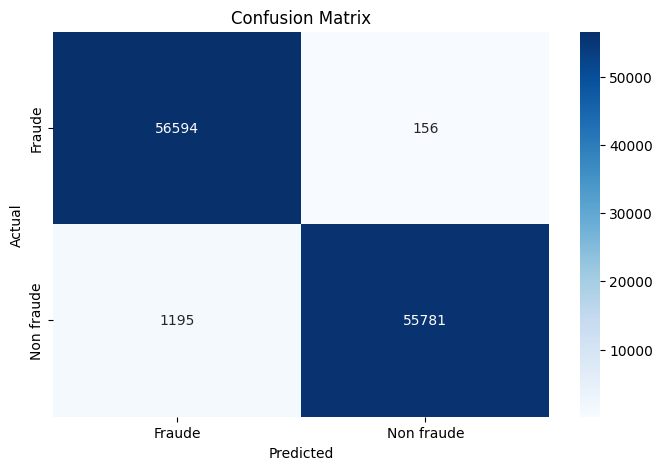

In [ ]:

# Visualisation des résultats
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=['Fraude','Non fraude'], yticklabels=['Fraude','Non fraude'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show

### Modèle catboost


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, loss_function='Logloss', verbose=100)
catboost_model.fit(X_train, y_train)

# Prédiction
y_pred = catboost_model.predict(X_test)

# Performances
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Affichage des performances
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

0:	learn: 0.5045851	total: 228ms	remaining: 1m 53s
100:	learn: 0.0188409	total: 16.7s	remaining: 1m 5s
200:	learn: 0.0070466	total: 33s	remaining: 49.1s
300:	learn: 0.0045040	total: 48.1s	remaining: 31.8s
400:	learn: 0.0044347	total: 1m 1s	remaining: 15.3s
499:	learn: 0.0042008	total: 1m 15s	remaining: 0us
Accuracy:  0.9994636230941034
Precision:  0.9989305187860512
Recall:  1.0


Classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Matrice de confusion 
 [[56689    61]
 [    0 56976]]


<function matplotlib.pyplot.show(close=None, block=None)>

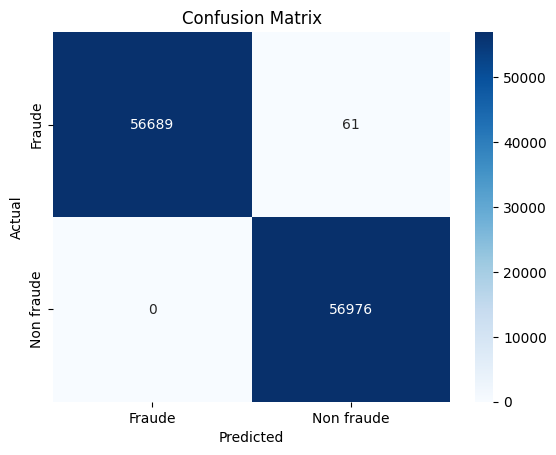

In [ ]:
# Classification Report
cr = classification_report(y_test, y_pred)
print("Classification report \n",cr)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion \n",cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True ,xticklabels=['Fraude','Non fraude'], yticklabels=['Fraude','Non fraude'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show

On voit que le modèle catboost donne de meilleurs résultats que le précédent. En particulier, avec un recall=1, on voit que ce modèle détecte toutes les transactions qui sont réellement frauduleuses.

### Modèle SVM (Support Vector Machine)

In [ ]:
# Importation des modules supplémentaires
from sklearn.svm import SVC


In [ ]:
# Construction d'un modèle SVM avec noyau RBF
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Entraîner le modèle
model.fit(X_train, y_train)


SVC(random_state=42)

In [ ]:
# Prédiction
y_pred = model.predict(X_test)

# Performances
accuracy = accuracy_score(y_test, y_pred)

Accuracy:  0.9968344969488068
Precision:  0.9964922127122211
Recall:  0.997191800056164
F1 score:  0.9968418836409573
Classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Matrice de confusion 
 [[56550   200]
 [  160 56816]]


<function matplotlib.pyplot.show(close=None, block=None)>

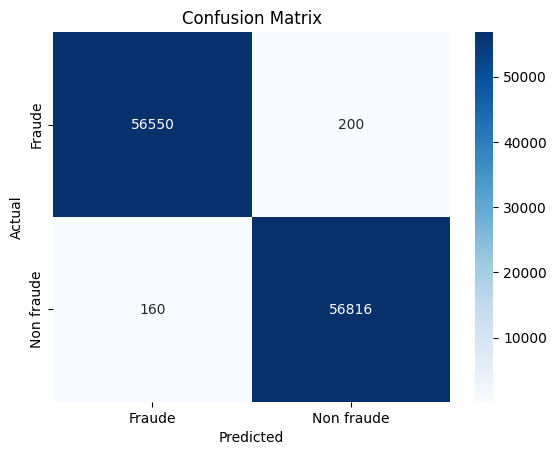

In [ ]:
# Autres résultats pour évaluer la performance du modèle
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Affichage
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)

# Classification Report
cr = classification_report(y_test, y_pred)
print("Classification report \n",cr)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion \n",cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True ,xticklabels=['Fraude','Non fraude'], yticklabels=['Fraude','Non fraude'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show


## **Conclusion**

En observant les performances des différents modèles réalisés à travers les métriques mises en exergue (**accuracy, precision,...**) on s'aperçoit que globalement, chacun des trois modèles réalisé est très performant. Voici un résumé de quelques caractéristiques de nos modèles :


#### **Performance des Modèles**

| Modèle       | Accuracy | Precision | Recall |
|--------------|----------|-----------|--------|
| Séquentiel   | 0.988    | 0.987     | 0.979  |
| Catboost     | 0.999    | 0.998     | 1.000  |
| SVM          | 0.996    | 0.996     | 0.997  |


Quoique tous les modèles testés présentent de très bonnes performances, le modèle **catboost** se démarque, avec des performances nettement meilleures que pour les autres modèles.
